In [417]:
words = open('names.txt','r').read().splitlines()

# Bigram approach

In [429]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1,ch2 in zip(chs, chs[1:]):
        bigram = ch1,ch2
        b[bigram] = b.get(bigram,0) + 1


In [ ]:
sorted(b.items(), key = lambda kv: -kv[1])

In [584]:
import torch

# lookup stoi
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {v:k for k,v in stoi.items()}

N = torch.zeros((27,27), dtype=torch.int32)
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        i = stoi[ch1]
        j = stoi[ch2]
        N[i,j] += 1
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [483]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

(-0.5, 26.5, 26.5, -0.5)

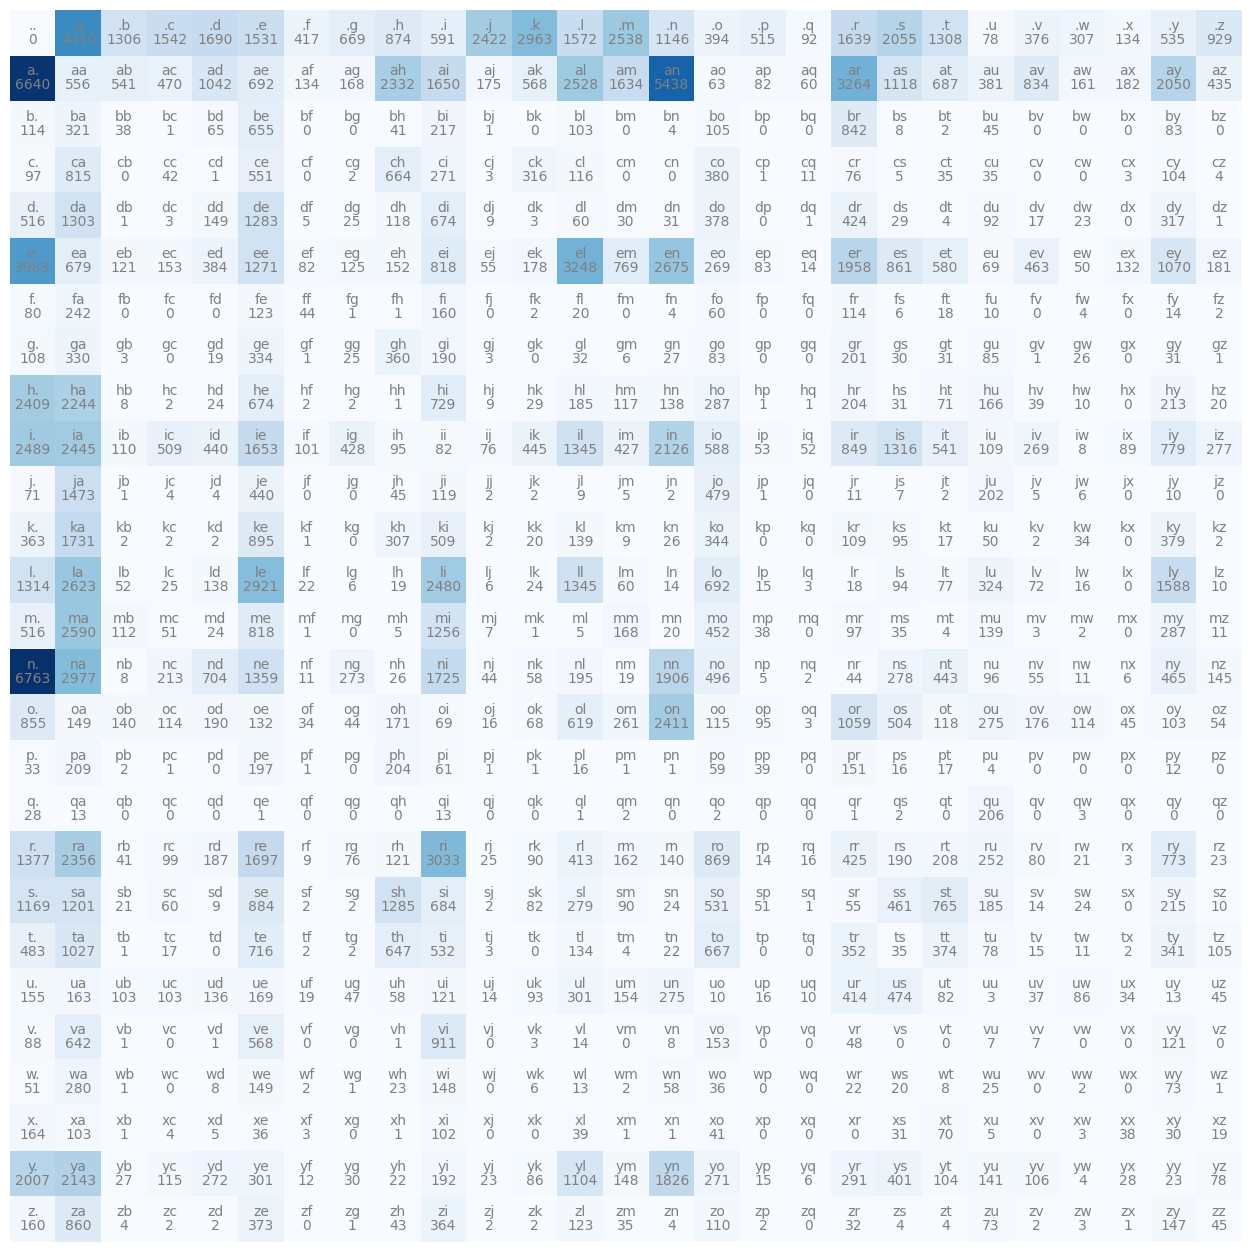

In [484]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha = 'center', va = "bottom", color = "gray")
        plt.text(j, i , N[i, j].item(), ha= "center", va= "top", color = "gray")
        plt.text()
plt.axis('off')

In [546]:
P = N[0].float() / N[0].float().sum()
P
N[0]
N[1].float().sum()


tensor(33885.)

In [560]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [559]:
p = N.float()
#p = p / p.sum(1)
p.sum(1)

tensor([32033., 33885.,  2645.,  3532.,  5496., 20423.,   905.,  1927.,  7616.,
        17701.,  2900.,  5040., 13958.,  6642., 18327.,  7934.,  1026.,   272.,
        12700.,  8106.,  5570.,  3135.,  2573.,   929.,   697.,  9776.,  2398.])

In [567]:
p = N.float()
p.sum(1,keepdim=True)


tensor([[32033.],
        [33885.],
        [ 2645.],
        [ 3532.],
        [ 5496.],
        [20423.],
        [  905.],
        [ 1927.],
        [ 7616.],
        [17701.],
        [ 2900.],
        [ 5040.],
        [13958.],
        [ 6642.],
        [18327.],
        [ 7934.],
        [ 1026.],
        [  272.],
        [12700.],
        [ 8106.],
        [ 5570.],
        [ 3135.],
        [ 2573.],
        [  929.],
        [  697.],
        [ 9776.],
        [ 2398.]])

So if you don't use keepdim=True, instead of dividing each j column by the sum of its ith row (normalizing), you end up dividing each j column by the sum of the jth row sum
e.g. you normalize the columns, not the rows

In [563]:
p = N.float() / N.float().sum(1)
p[0]

tensor([0.0000, 0.1301, 0.4938, 0.4366, 0.3075, 0.0750, 0.4608, 0.3472, 0.1148,
        0.0334, 0.8352, 0.5879, 0.1126, 0.3821, 0.0625, 0.0497, 0.5019, 0.3382,
        0.1291, 0.2535, 0.2348, 0.0249, 0.1461, 0.3305, 0.1923, 0.0547, 0.3874])

(-0.5, 26.5, 26.5, -0.5)

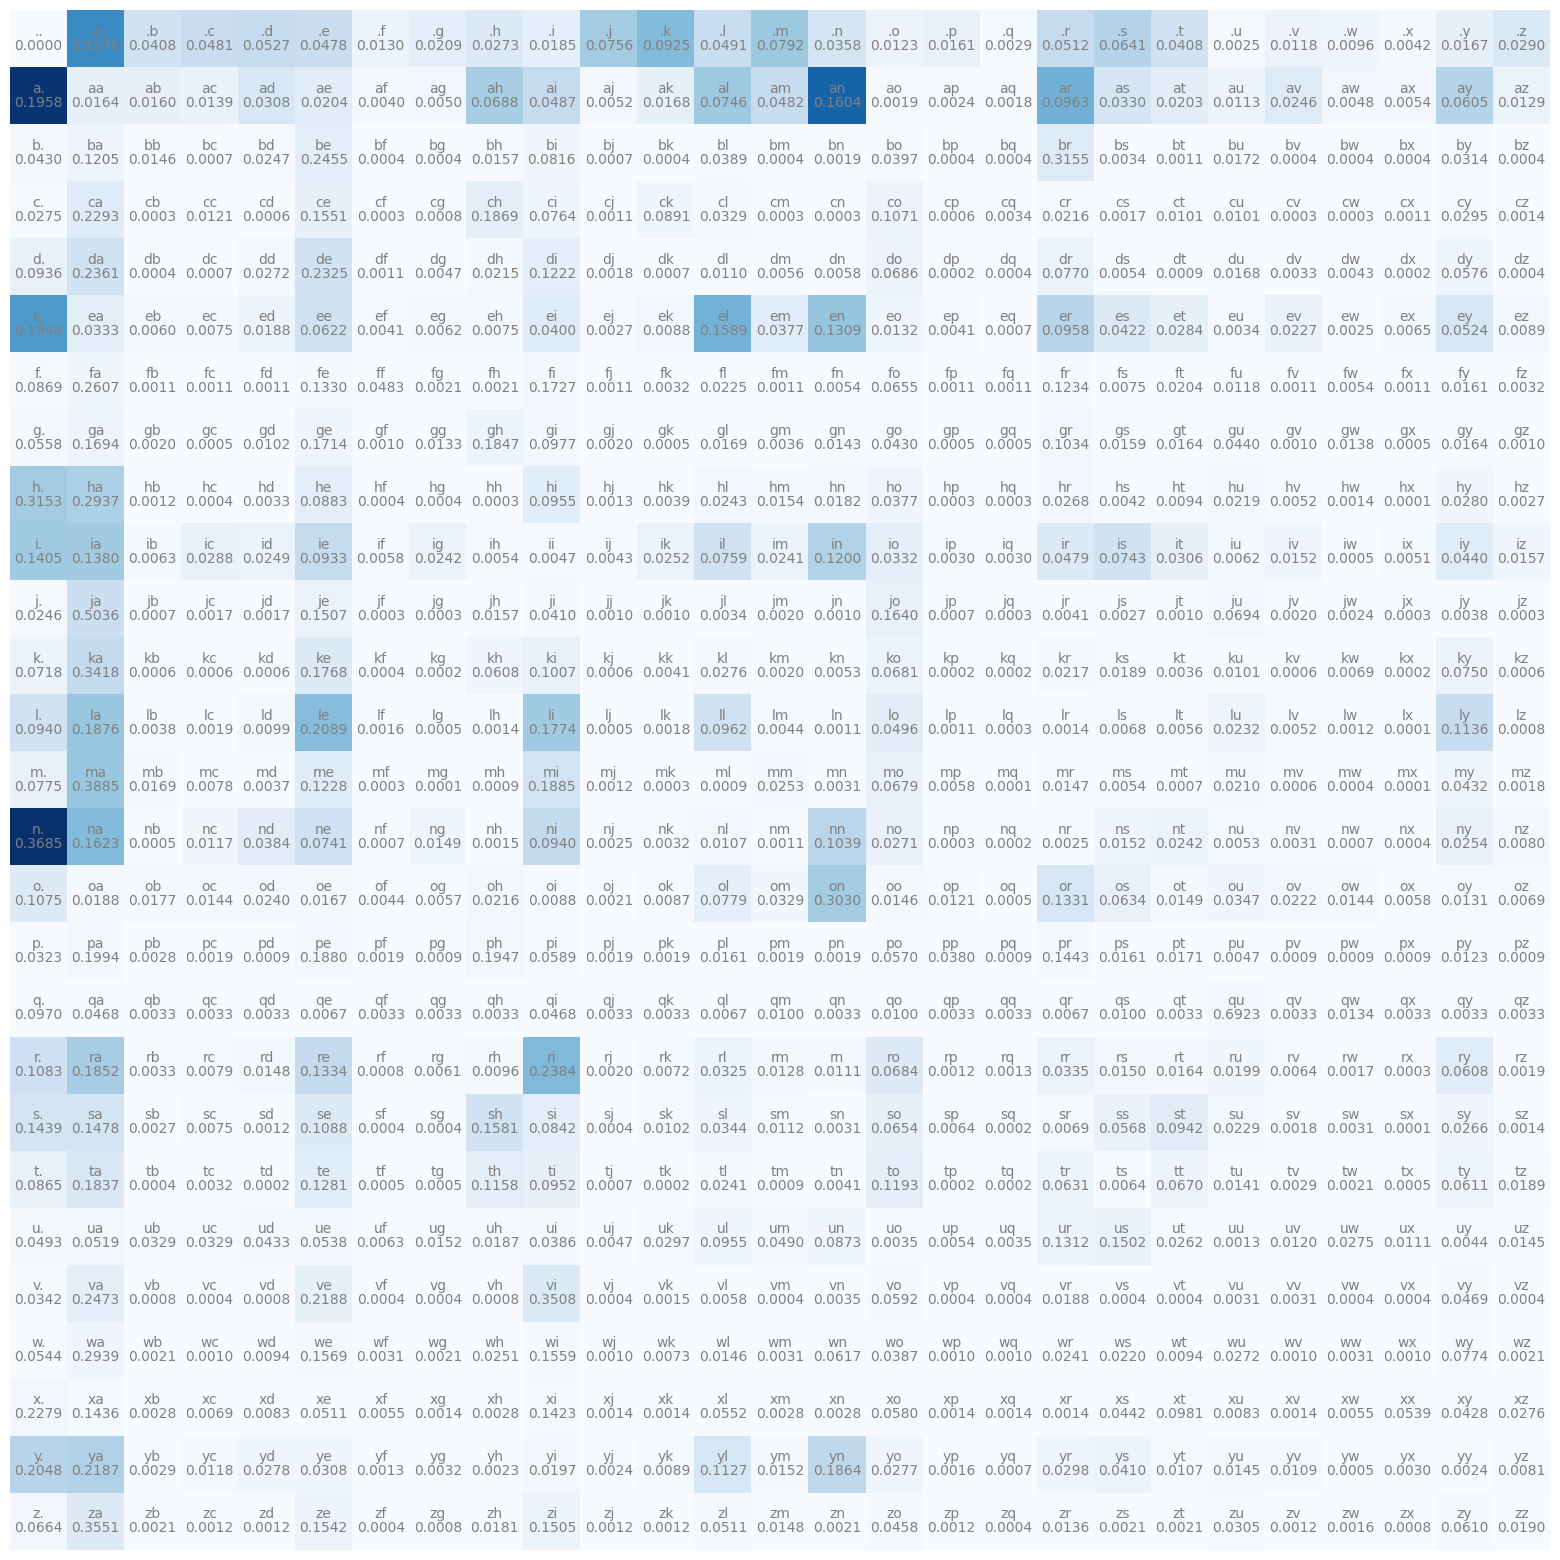

In [610]:
# p = N.float() / N.float().sum(1,keepdim=True)
# p[0]

# Below is faster, by using in-place operations
# Correct probability distribution
P = N.float()
# We can also smooth the probability distribution
P = (N+1).float()
P /= P.sum(1,keepdim=True)

plt.figure(figsize=(20,20))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha = 'center', va = "bottom", color = "gray")
        plt.text(j, i , f"{P[i, j].item():.4f}", ha= "center", va= "top", color = "gray")
plt.axis('off')

In [571]:
# To sample one
g = torch.Generator().manual_seed(2147483647)
# p = N[0].float()
# p = p / p.sum()
ix = torch.multinomial(p[0],num_samples=1, generator=g, replacement=True).item()
itos[ix]

'c'

In [579]:
# Create a name
g = torch.Generator().manual_seed(2147483647)
for _ in range(10):
    ix = 0
    out = []
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))


cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


### Bigram Loss Function

In [614]:
n = 0
log_likelihood = 0
#for w in words:
for w in ["andrejq"]:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f"{ch1}{ch2}: {prob:.4f} {logprob:.4f}")

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll}')
print(f'{nll/n}')

.a: 0.1376 -1.9835
an: 0.1604 -1.8302
nd: 0.0384 -3.2594
dr: 0.0770 -2.5646
re: 0.1334 -2.0143
ej: 0.0027 -5.9004
jq: 0.0003 -7.9817
q.: 0.0970 -2.3331
log_likelihood=tensor(-27.8672)
27.867216110229492
3.4834020137786865
